## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Sep  6 06:40:38 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
!pip install --upgrade ray
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 MB 22.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 575.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.7/871.7 kB 5.6 MB/s eta 0:00:0000:0100:01


In [4]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.88 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5846.1/8062.4 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="********************")
project = rf.workspace("nishant-raghuwanshi-deep-learning").project("satellite-images-jnhcj-jtugd")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 1.3 MB/s eta 0:00:00eta 0:00:01
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.88, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to satellite-images-1 in yolov8:: 100%|██████████| 6100/6100 [00:01<00:00, 5325.59it/s]


## Custom Training

In [7]:
!yolo task=detect mode=train model=yolov8m.yaml data=/kaggle/input/yaml-file-2/data.yaml epochs=80 imgsz=800 

Ultralytics YOLOv8.2.88 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/kaggle/input/yaml-file-2/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

In [8]:
!ls {HOME}/runs/detect/train/                                                            

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch11690.jpg
P_curve.png					   train_batch11691.jpg
R_curve.png					   train_batch11692.jpg
args.yaml					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1725605304.ff2fc395fbce.136.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


## Validate Custom Model

In [9]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/kaggle/input/yaml-file-2/data.yaml

/kaggle/working
Ultralytics YOLOv8.2.88 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 218 layers, 25,853,077 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /kaggle/working/satellite-images-1/valid/labels.cache... 254 image
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        254        528        0.6      0.596      0.593      0.382
        Baseball field         11         15      0.666      0.867       0.89      0.613
                Church         19         19       0.57      0.842      0.816      0.413
             Farmlands         23         24      0.676      0.833      0.882      0.793
                Forest         18         19      0.916      0.895      0.903      0.783
             Mountains         11         23      0.304      0.323      0.289      0.141
                  Pond         15         18      0.936      0.807      0.848      0.568
       Railway Station          5

## Inference with Custom Model

In [10]:
%cd {HOME}
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/satellite-images-1/test/images save=True

/kaggle/working
Ultralytics YOLOv8.2.88 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 218 layers, 25,853,077 parameters, 0 gradients, 78.8 GFLOPs

image 1/127 /kaggle/working/satellite-images-1/test/images/00201_jpg.rf.8361efa25b80b64adb1ceae095ede2b6.jpg: 800x800 1 playground, 58.8ms
image 2/127 /kaggle/working/satellite-images-1/test/images/00205_jpg.rf.eaaf42a8875ca7c96a5af9c20cadbb45.jpg: 800x800 1 building, 1 playground, 52.1ms
image 3/127 /kaggle/working/satellite-images-1/test/images/00211_jpg.rf.f9eb7553a29c6a8a8ace933eb8db426b.jpg: 800x800 1 playground, 52.0ms
image 4/127 /kaggle/working/satellite-images-1/test/images/00219_jpg.rf.8448083694c11256c327da4488e60ec8.jpg: 800x800 1 playground, 52.1ms
image 5/127 /kaggle/working/satellite-images-1/test/images/00223_jpg.rf.650c061d26a9353d52a823c38613b8c7.jpg: 800x800 1 playground, 47.6ms
image 6/127 /kaggle/working/satellite-images-1/test/images/00409_jpg.rf.c8de6ebe6ca32621e7d91b243734b2a2.jpg: 

**NOTE:** Let's take a look at few results.

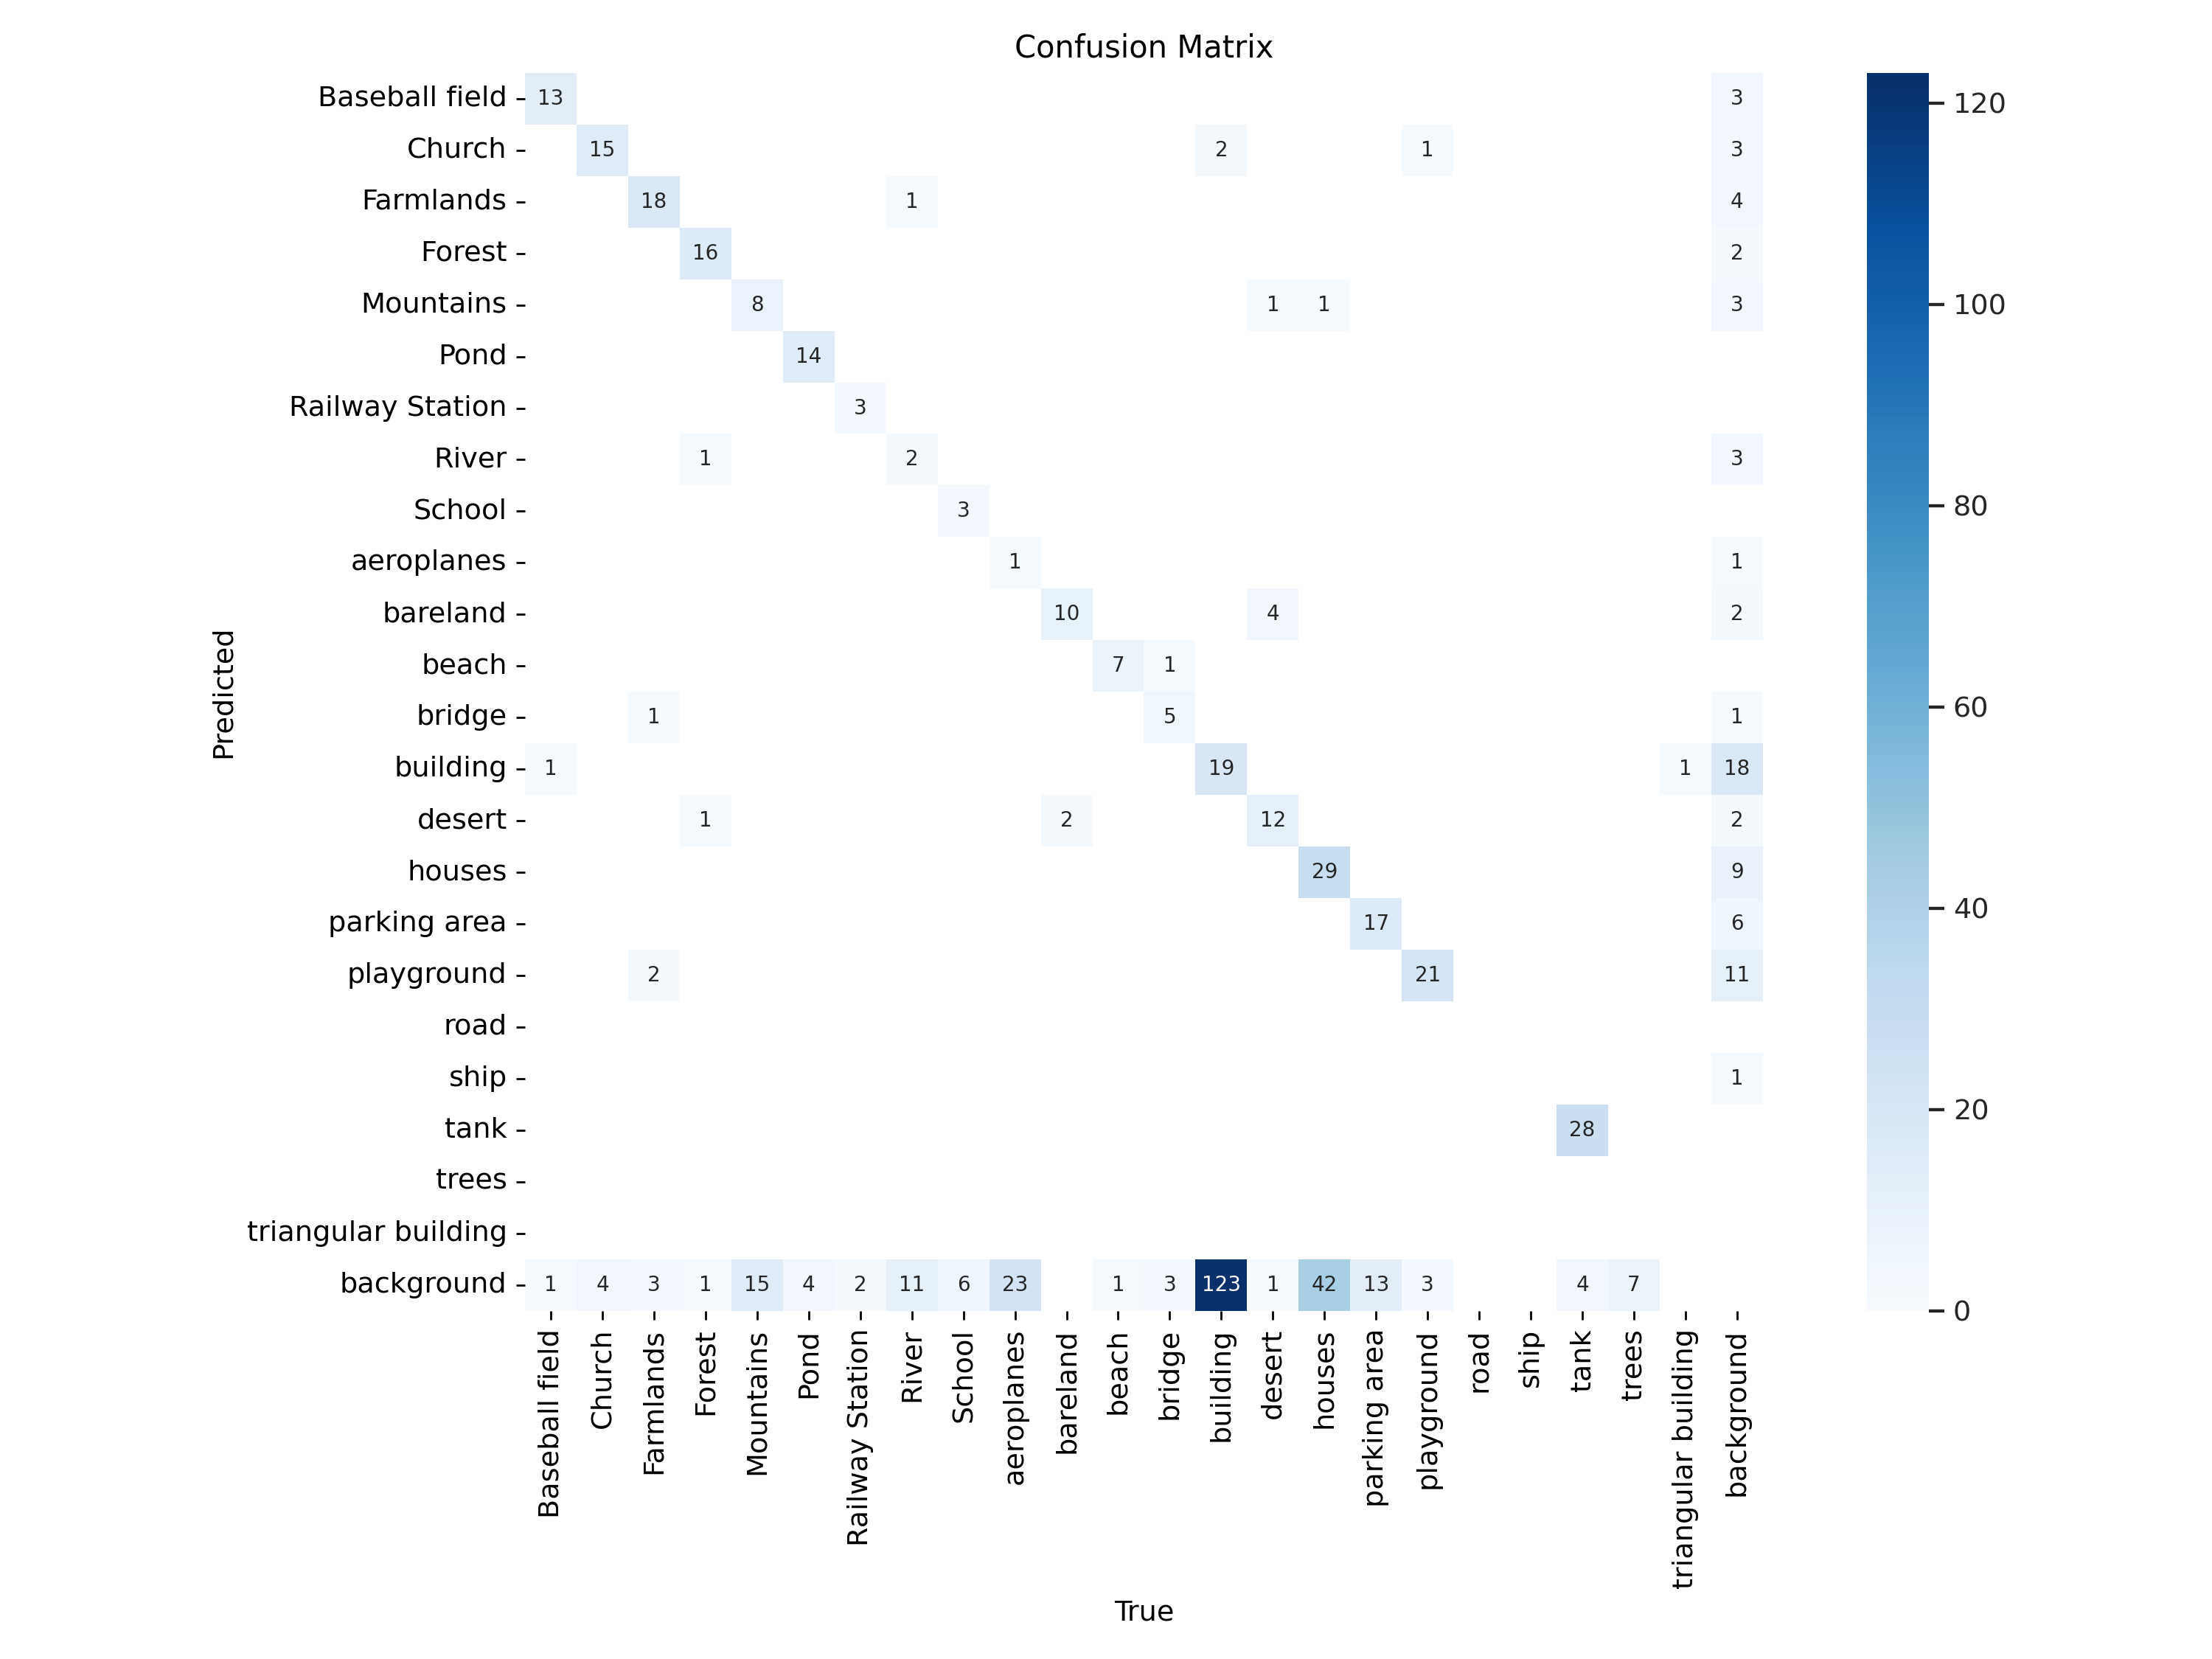

In [12]:
Image(filename='/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

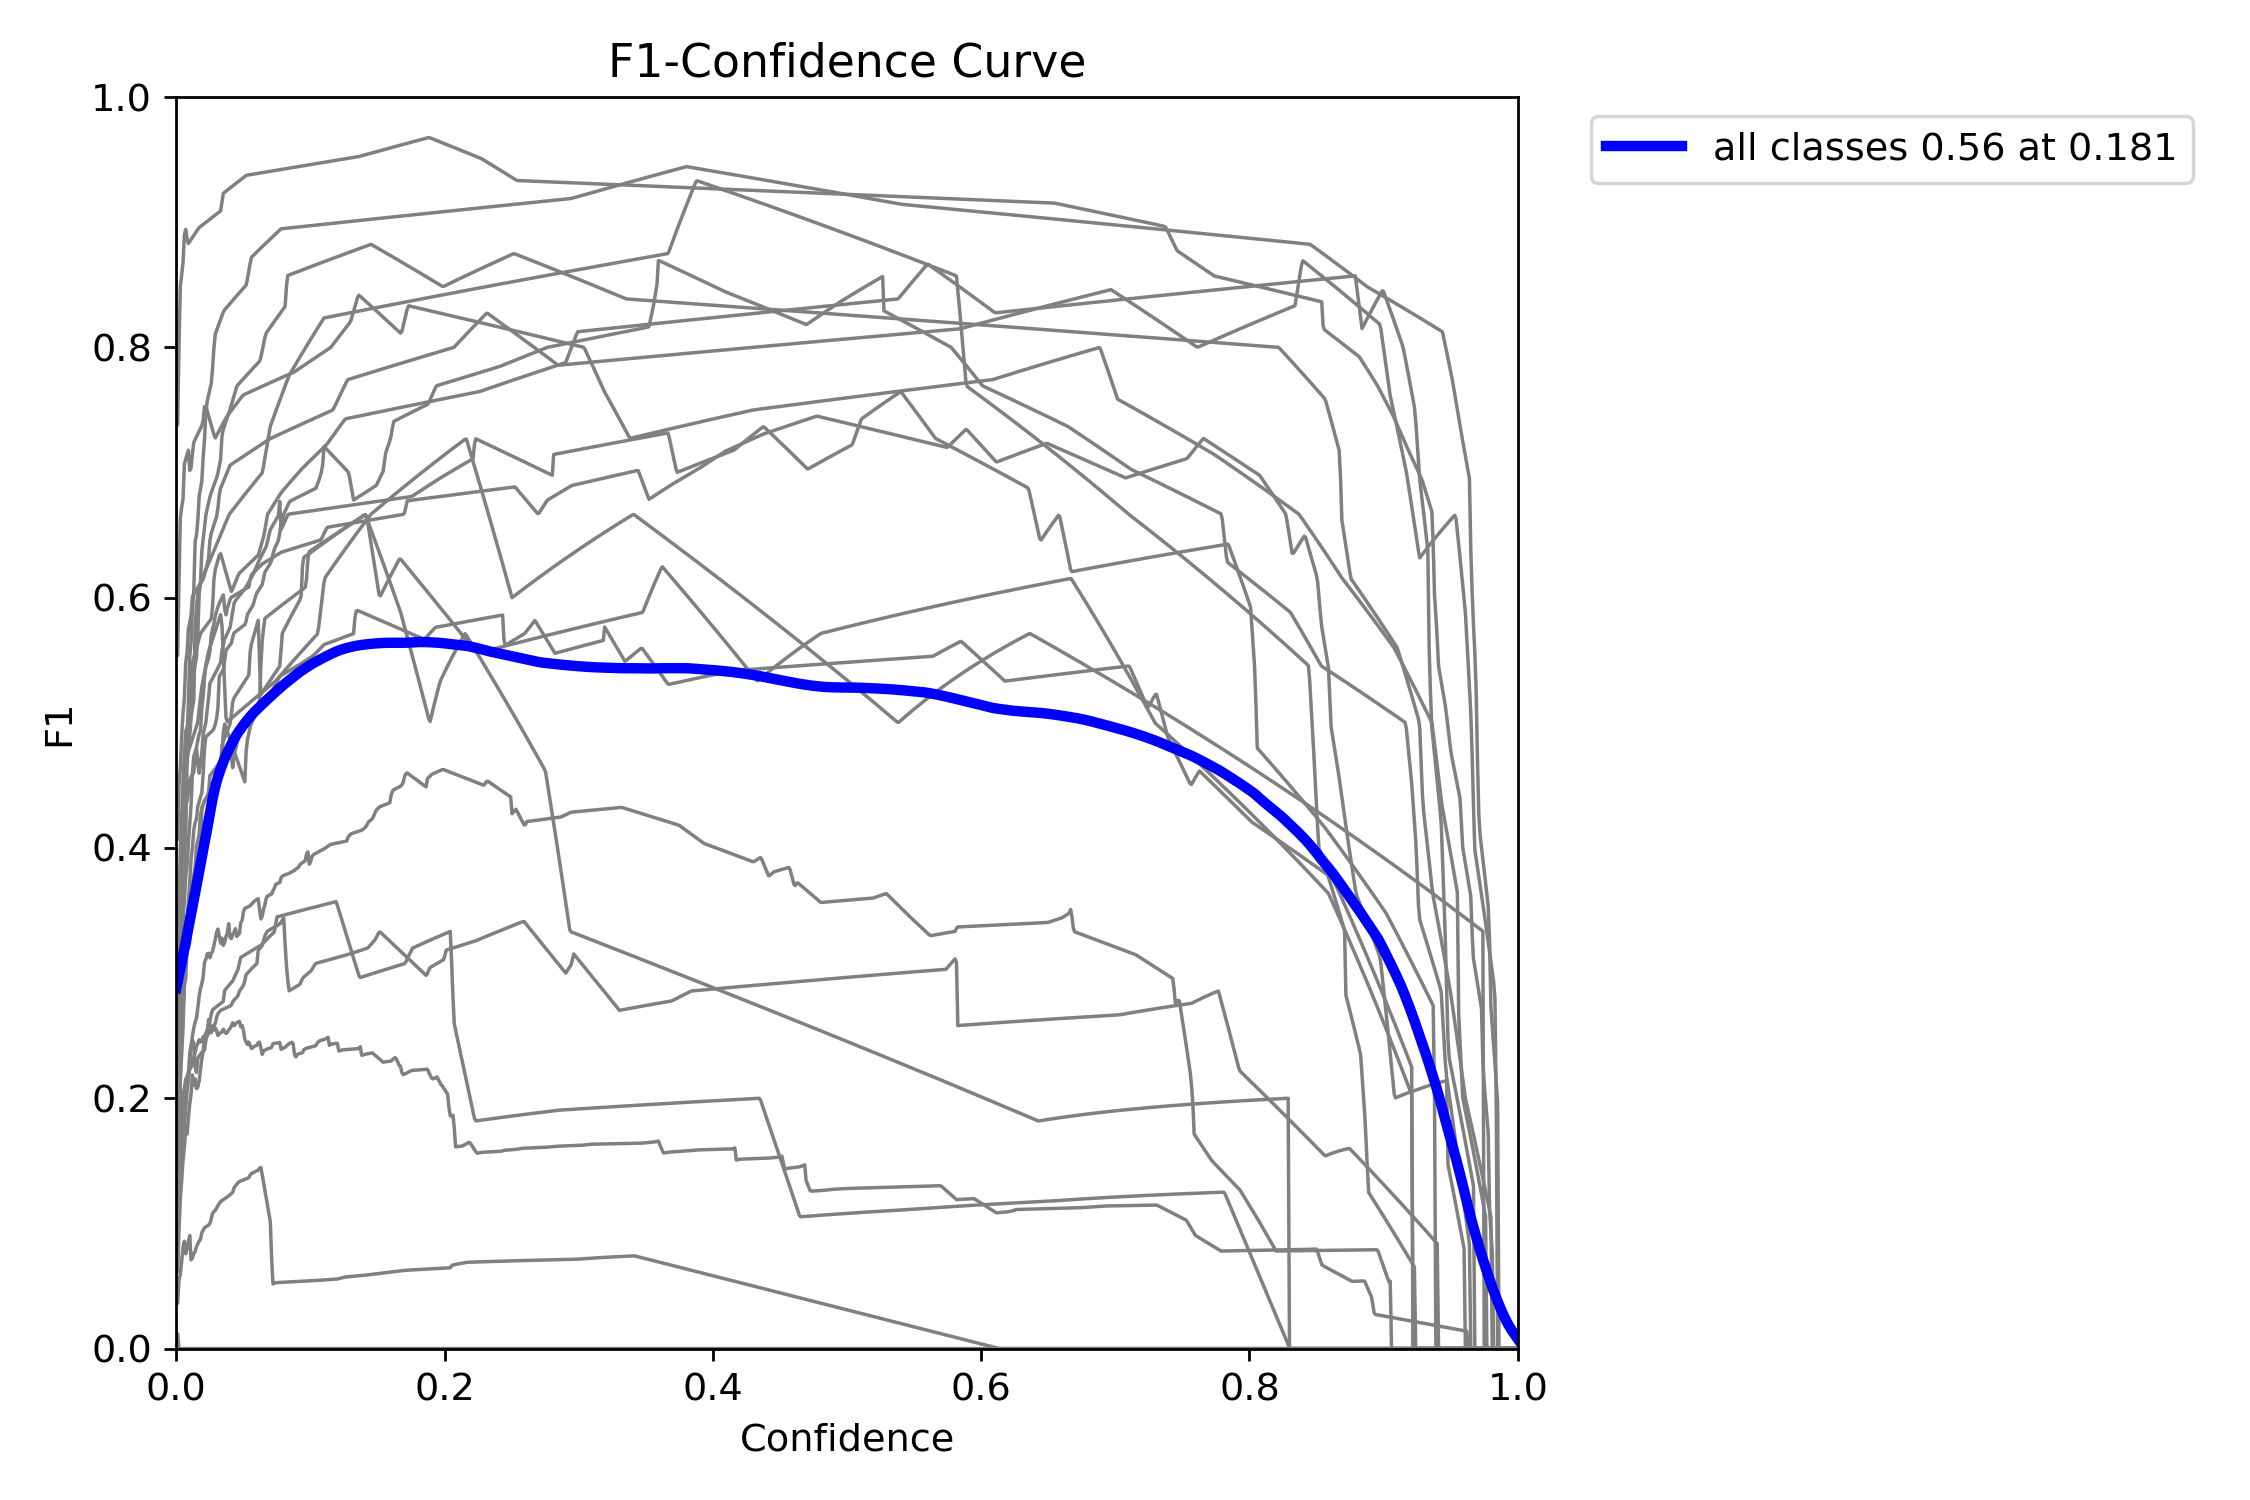

In [13]:
Image(filename='/kaggle/working/runs/detect/train/F1_curve.png', width=600)

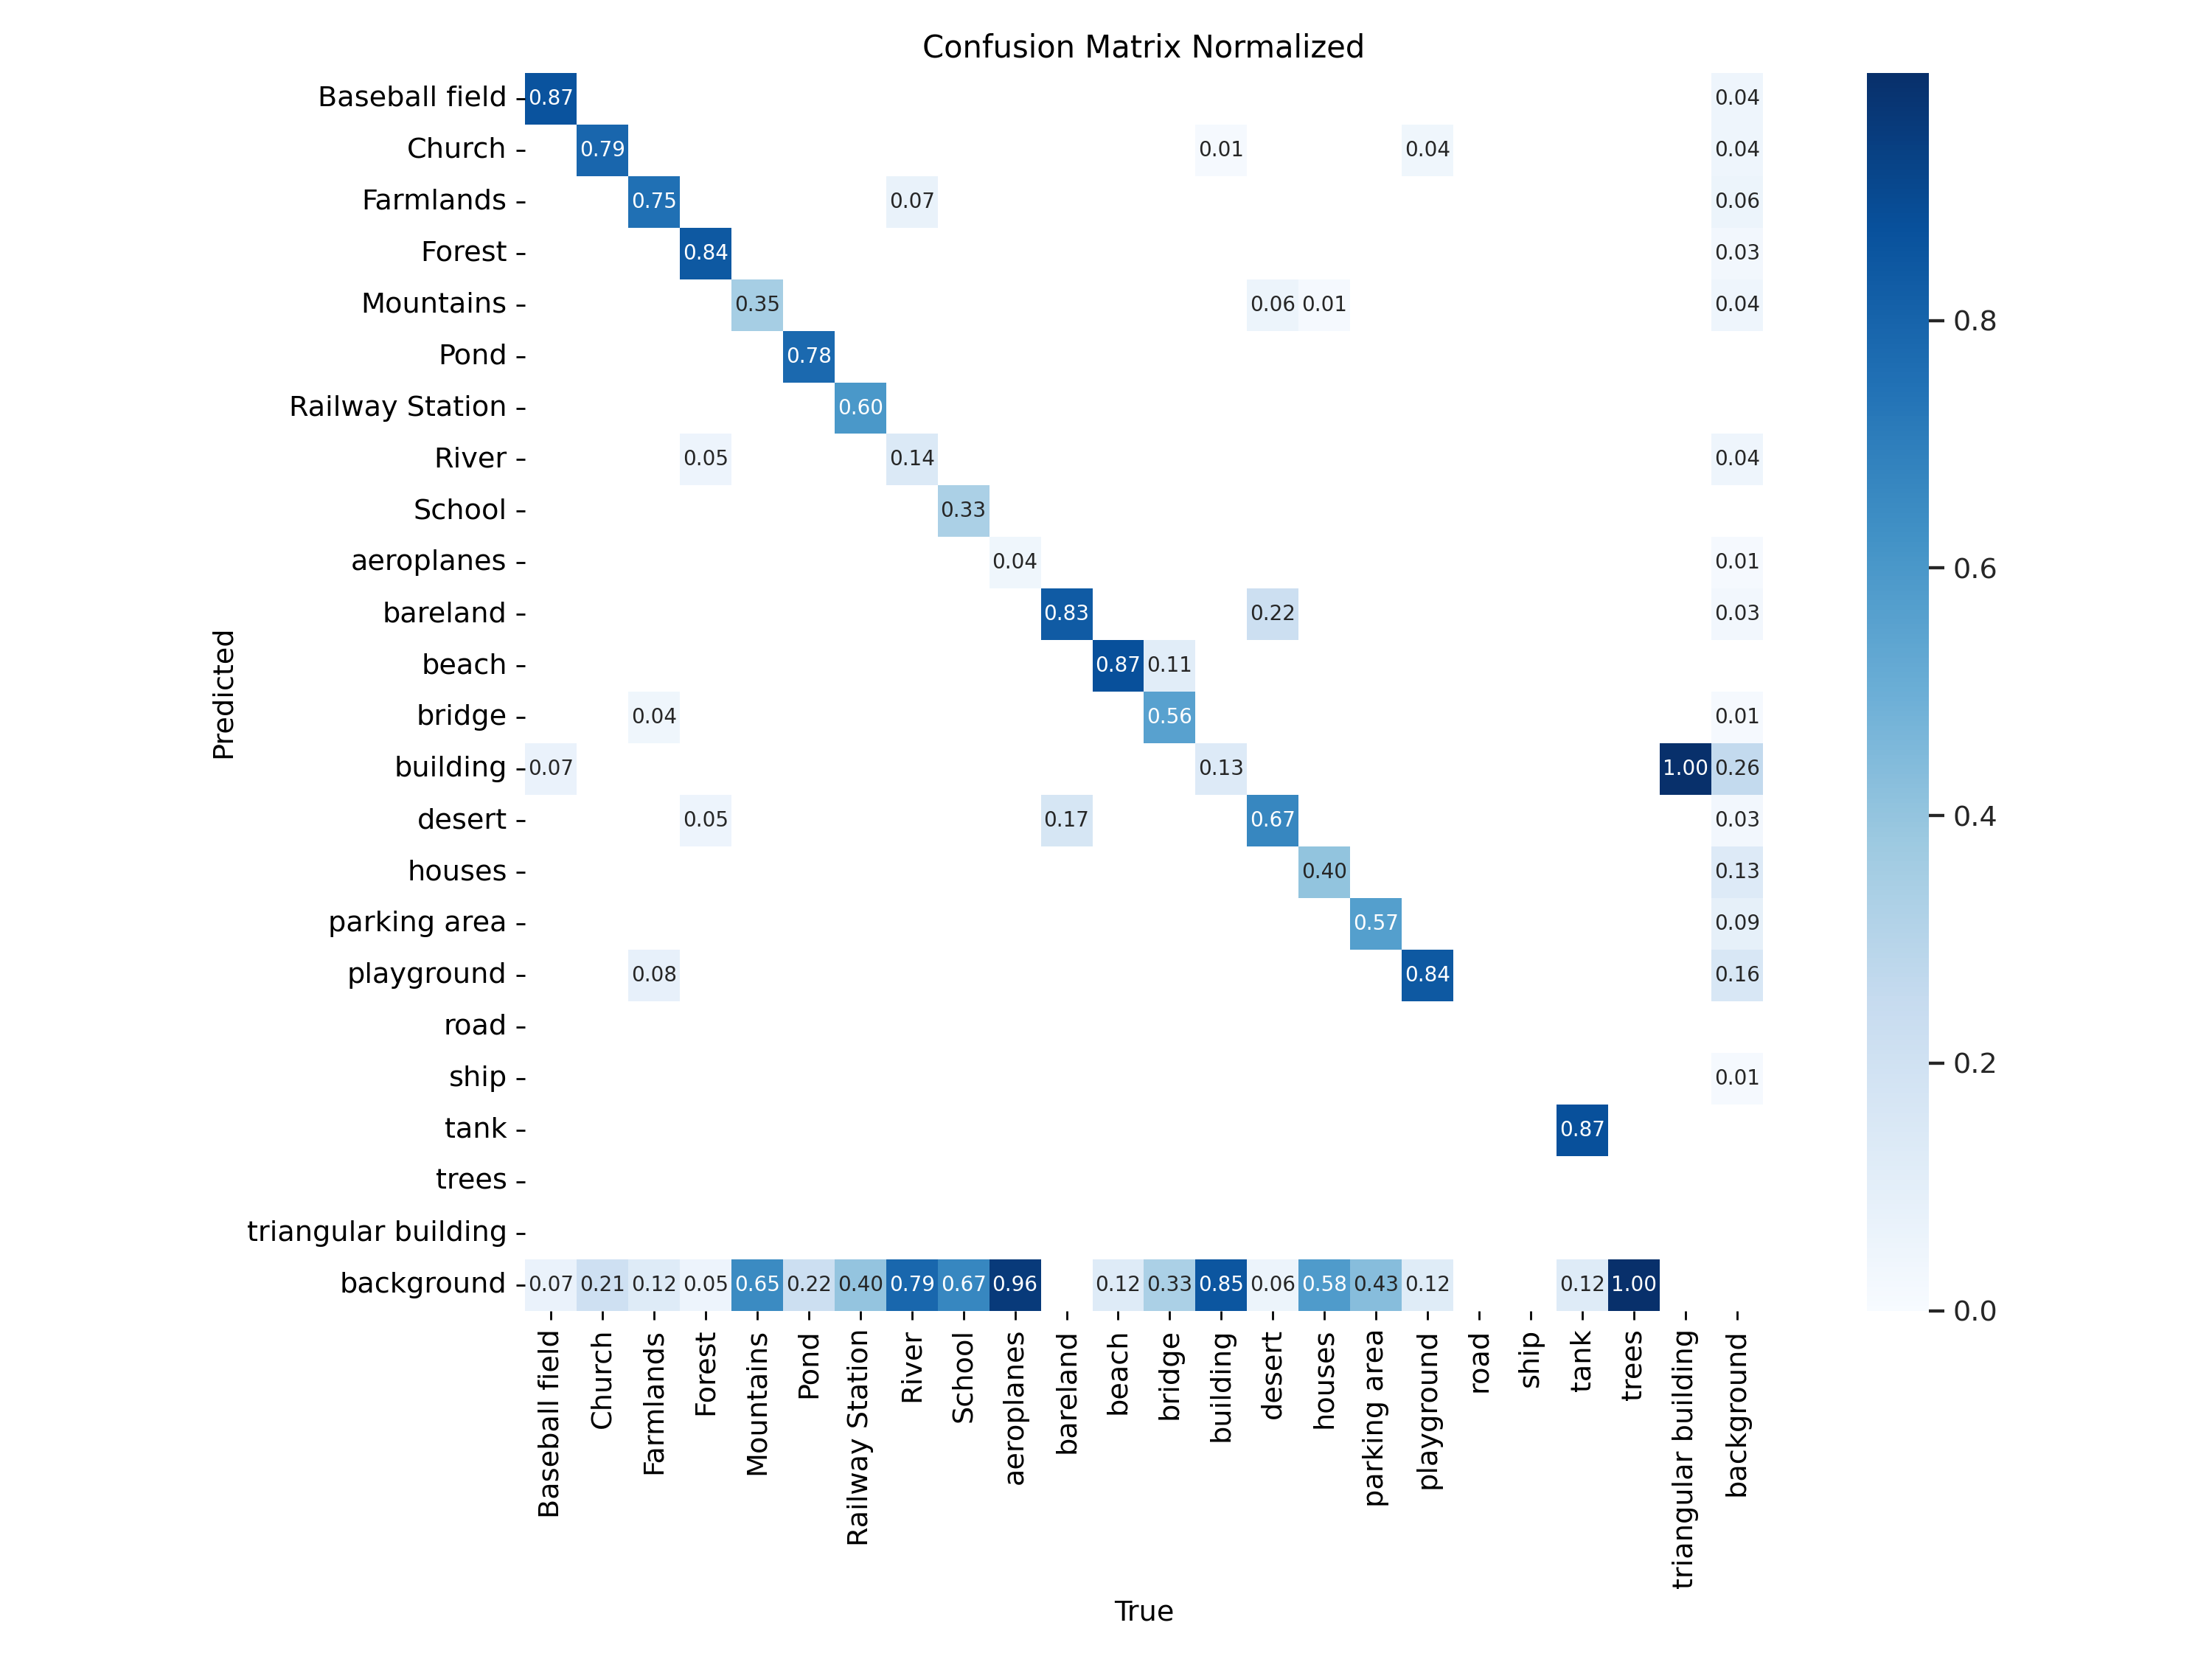

In [14]:
Image(filename='/kaggle/working/runs/detect/train/confusion_matrix_normalized.png', width=600)

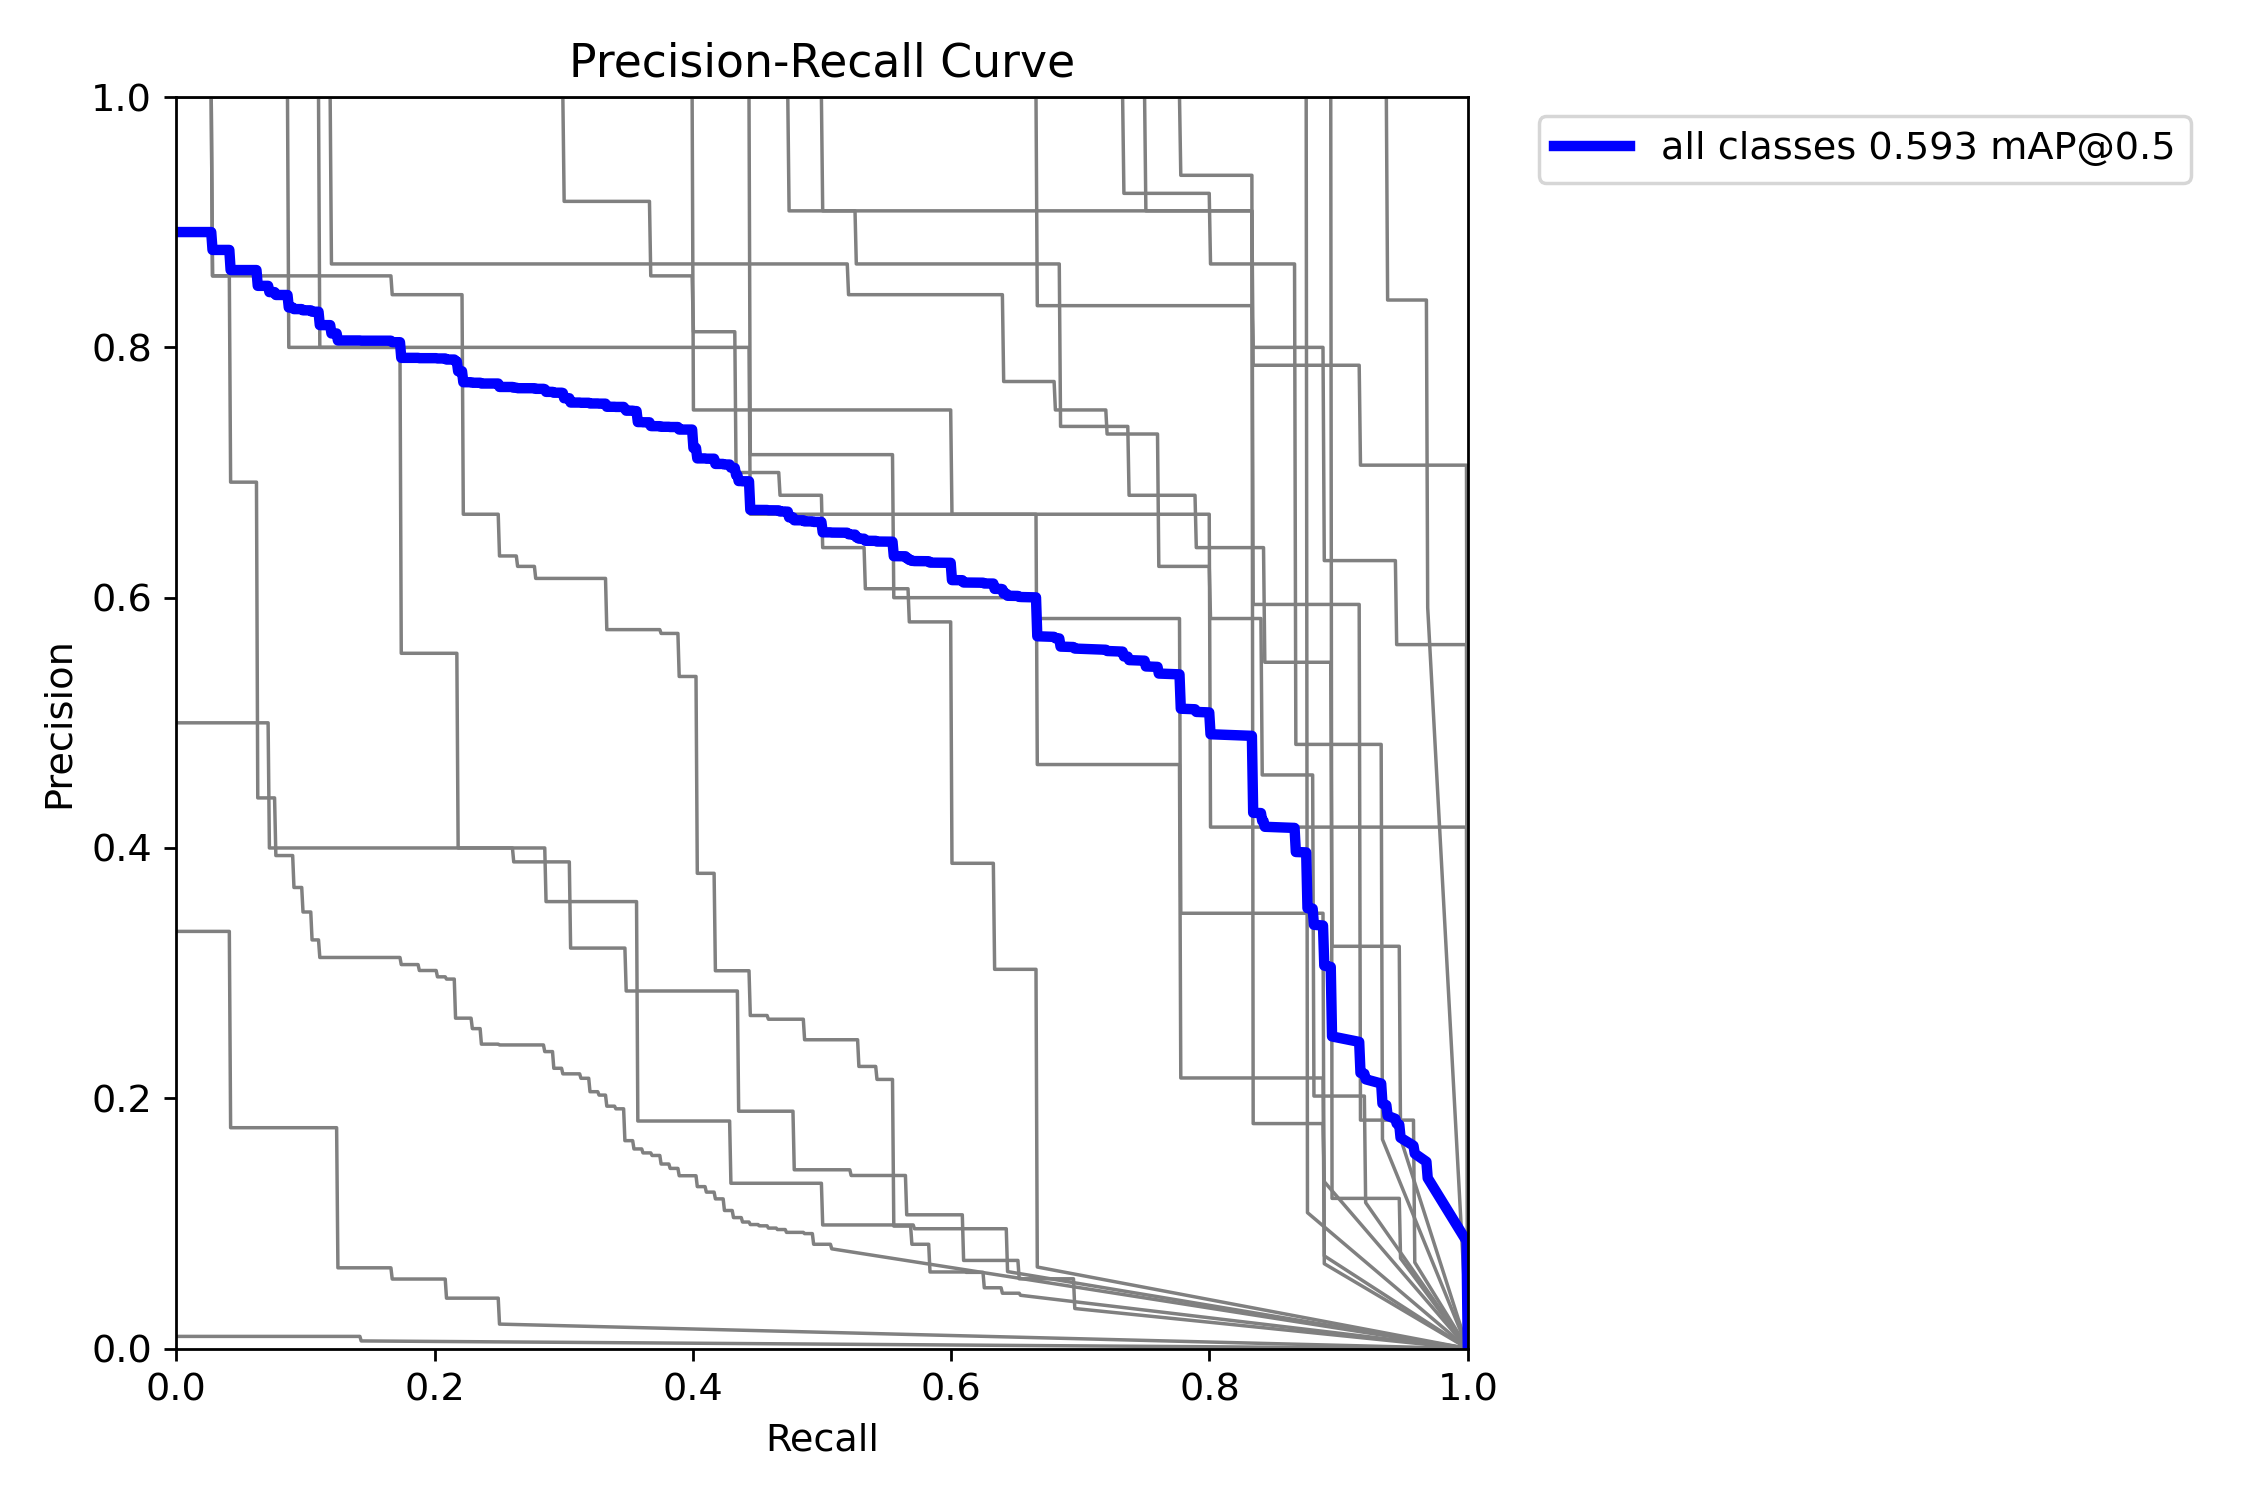

In [15]:
Image(filename='/kaggle/working/runs/detect/train/PR_curve.png', width=600)

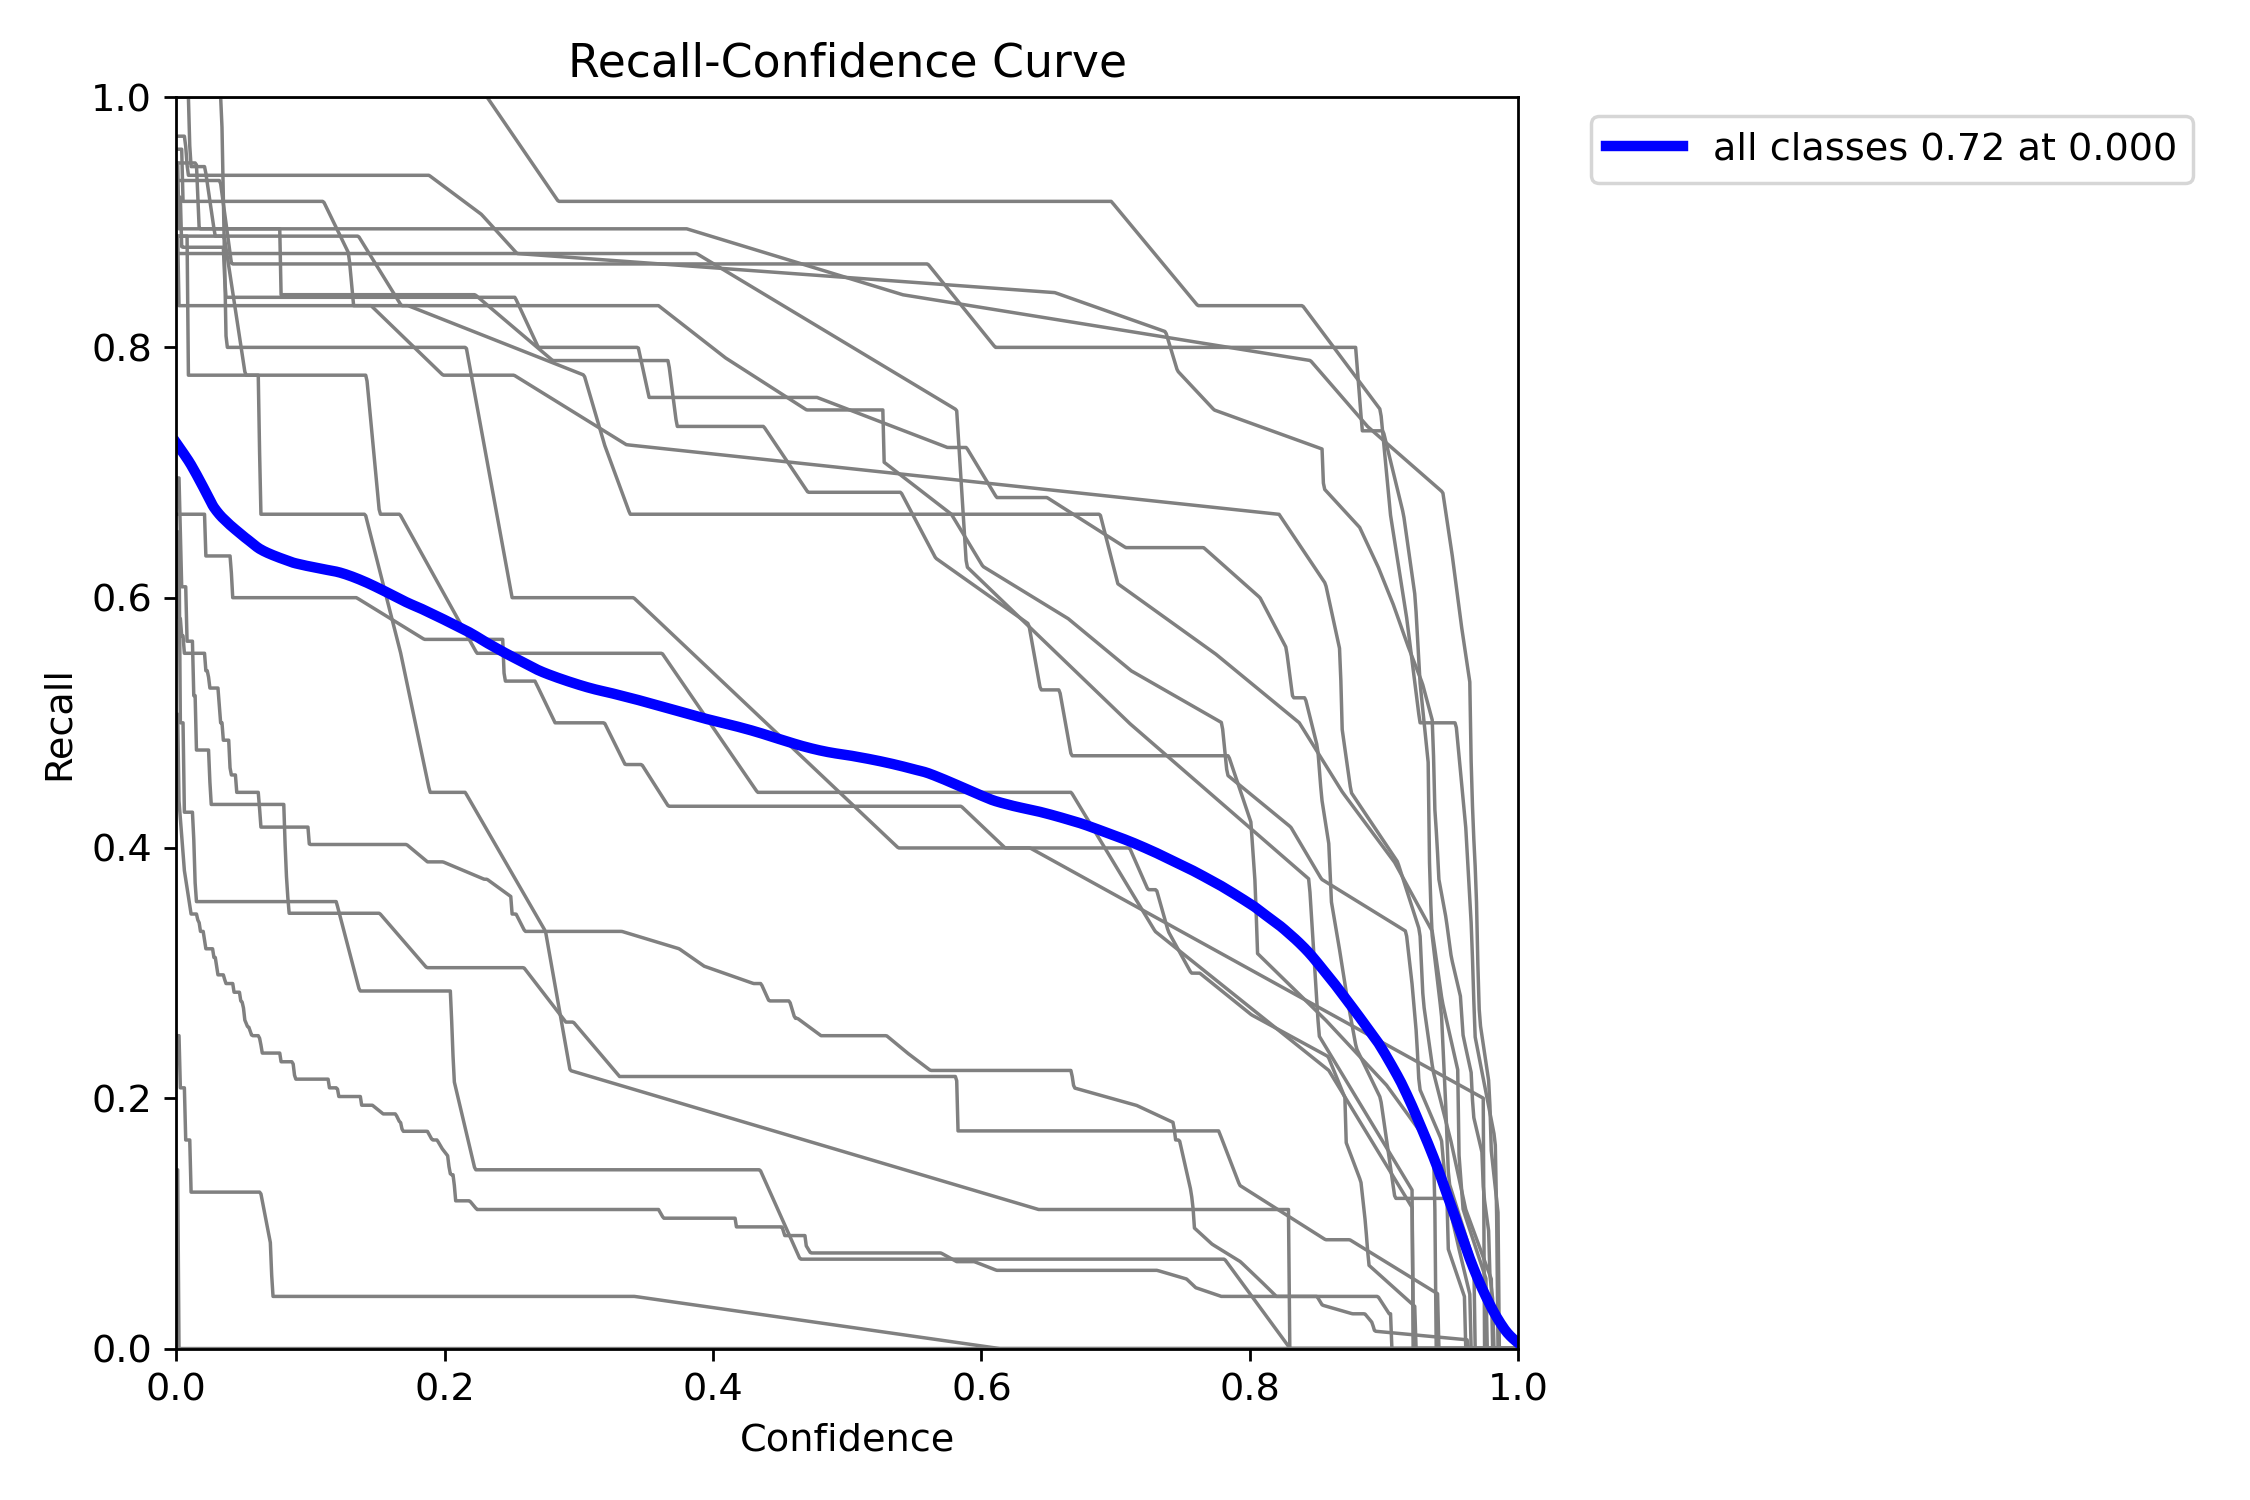

In [16]:
Image(filename='/kaggle/working/runs/detect/train/R_curve.png', width=600)

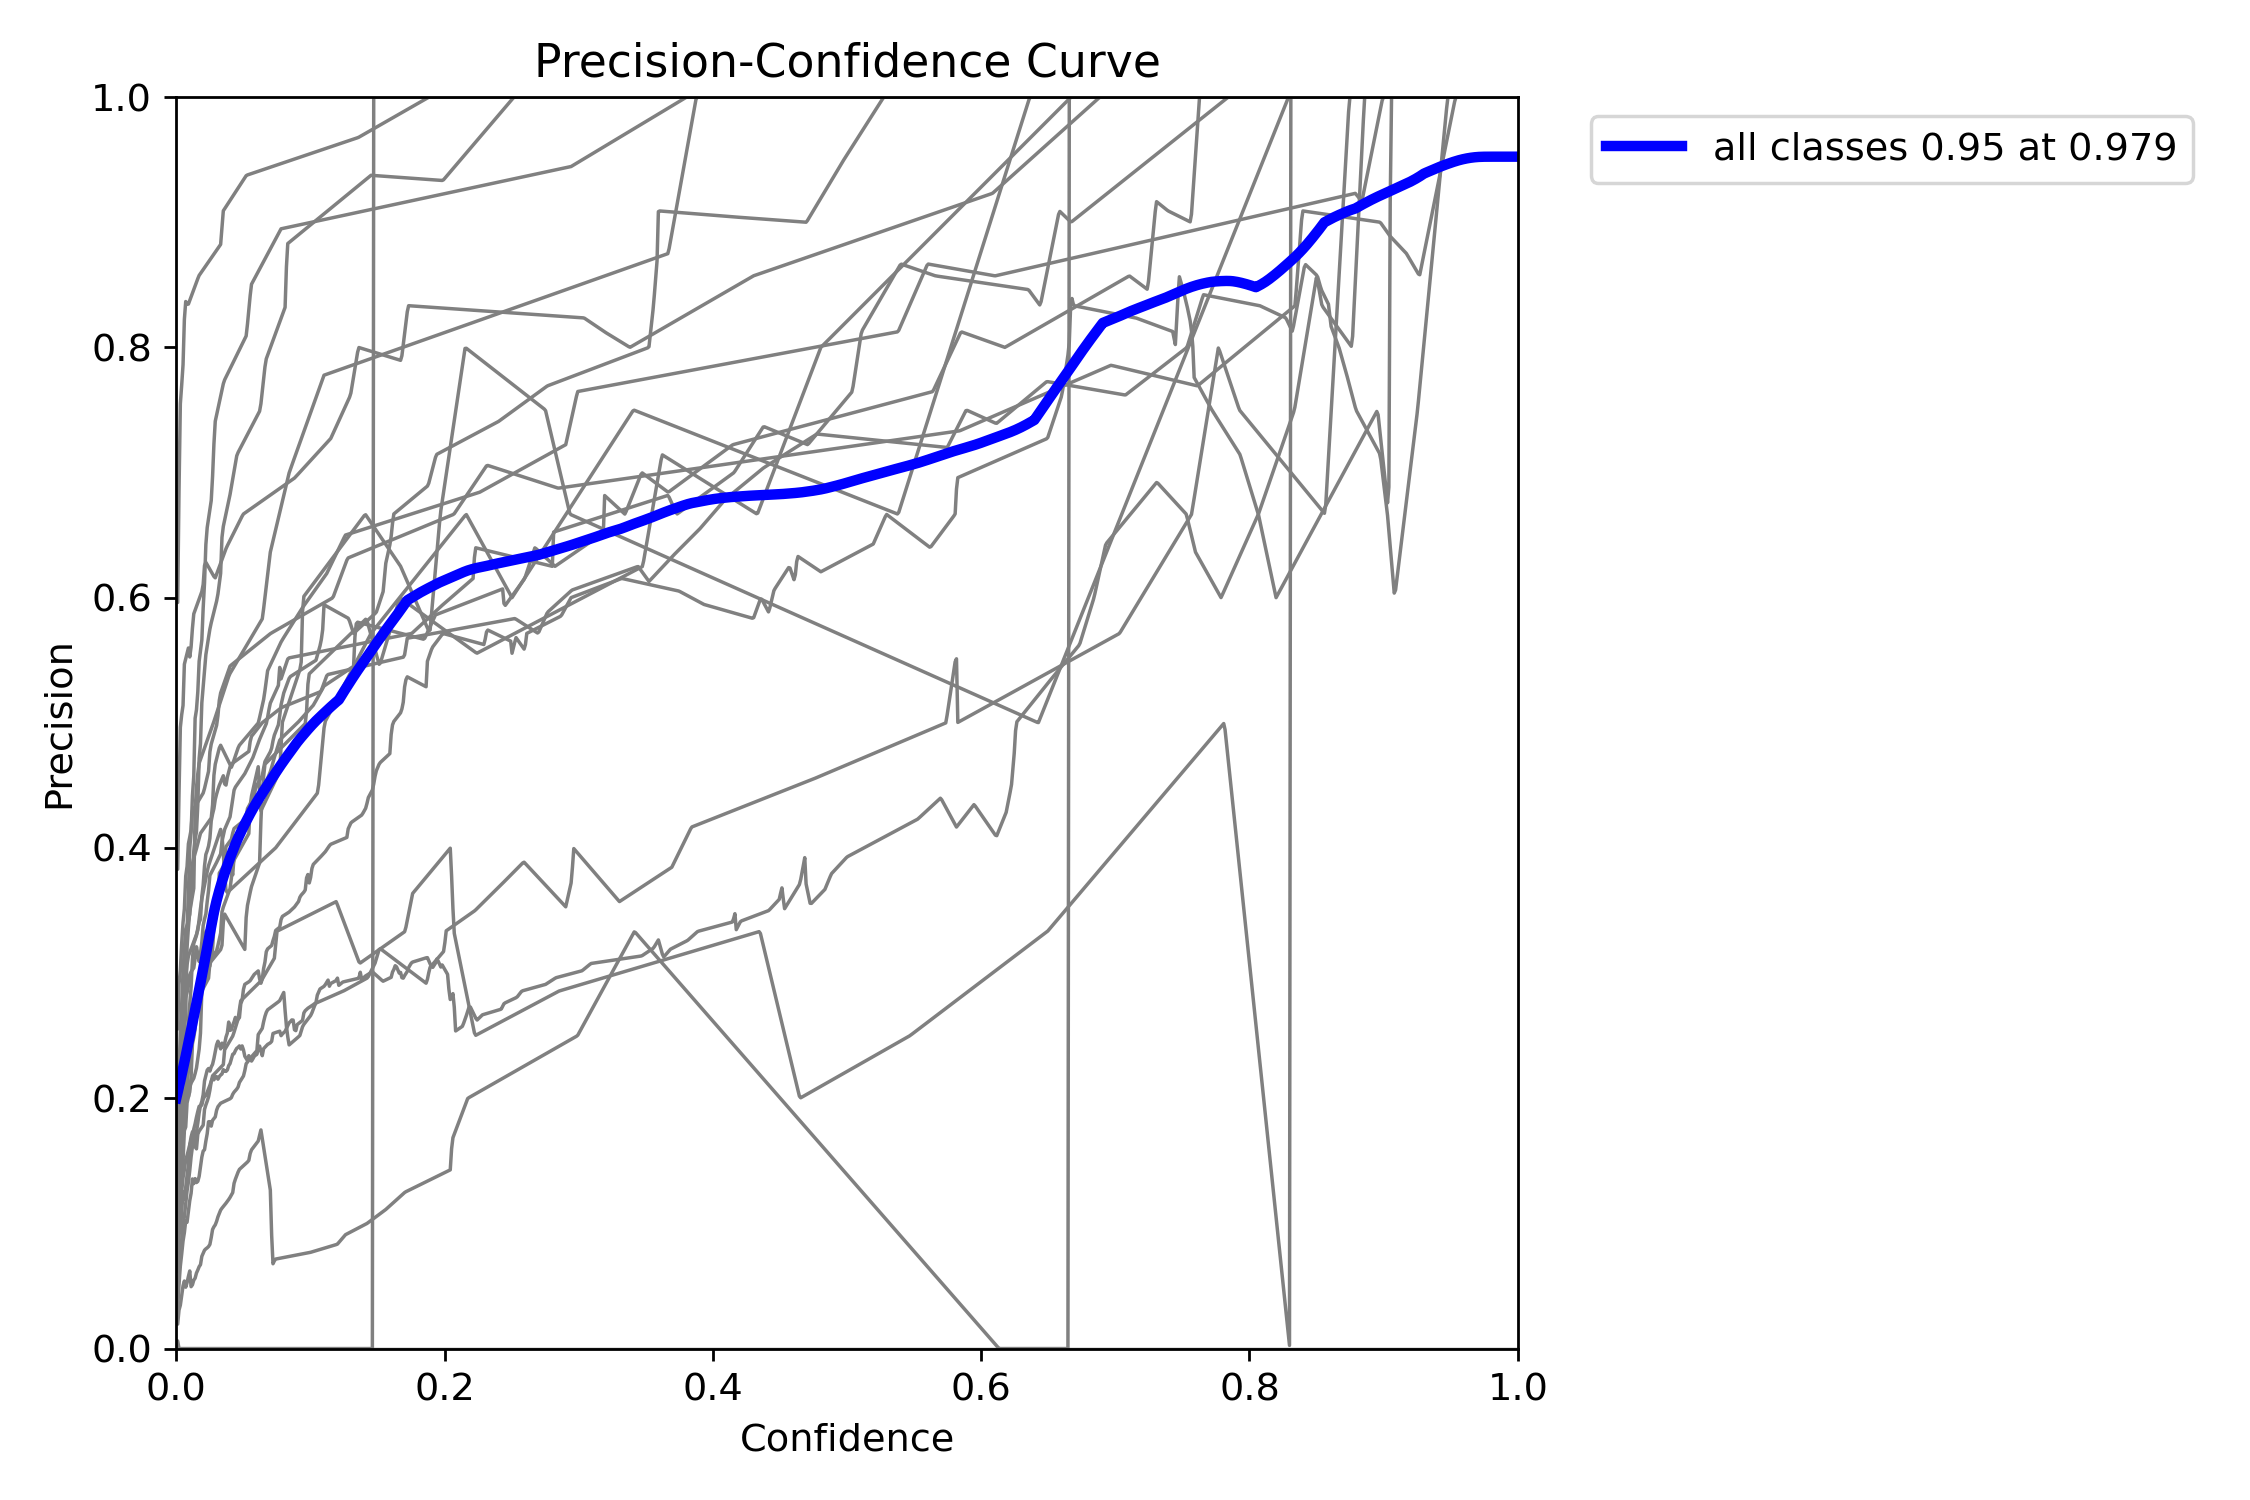

In [17]:
Image(filename='/kaggle/working/runs/detect/train/P_curve.png', width=600)

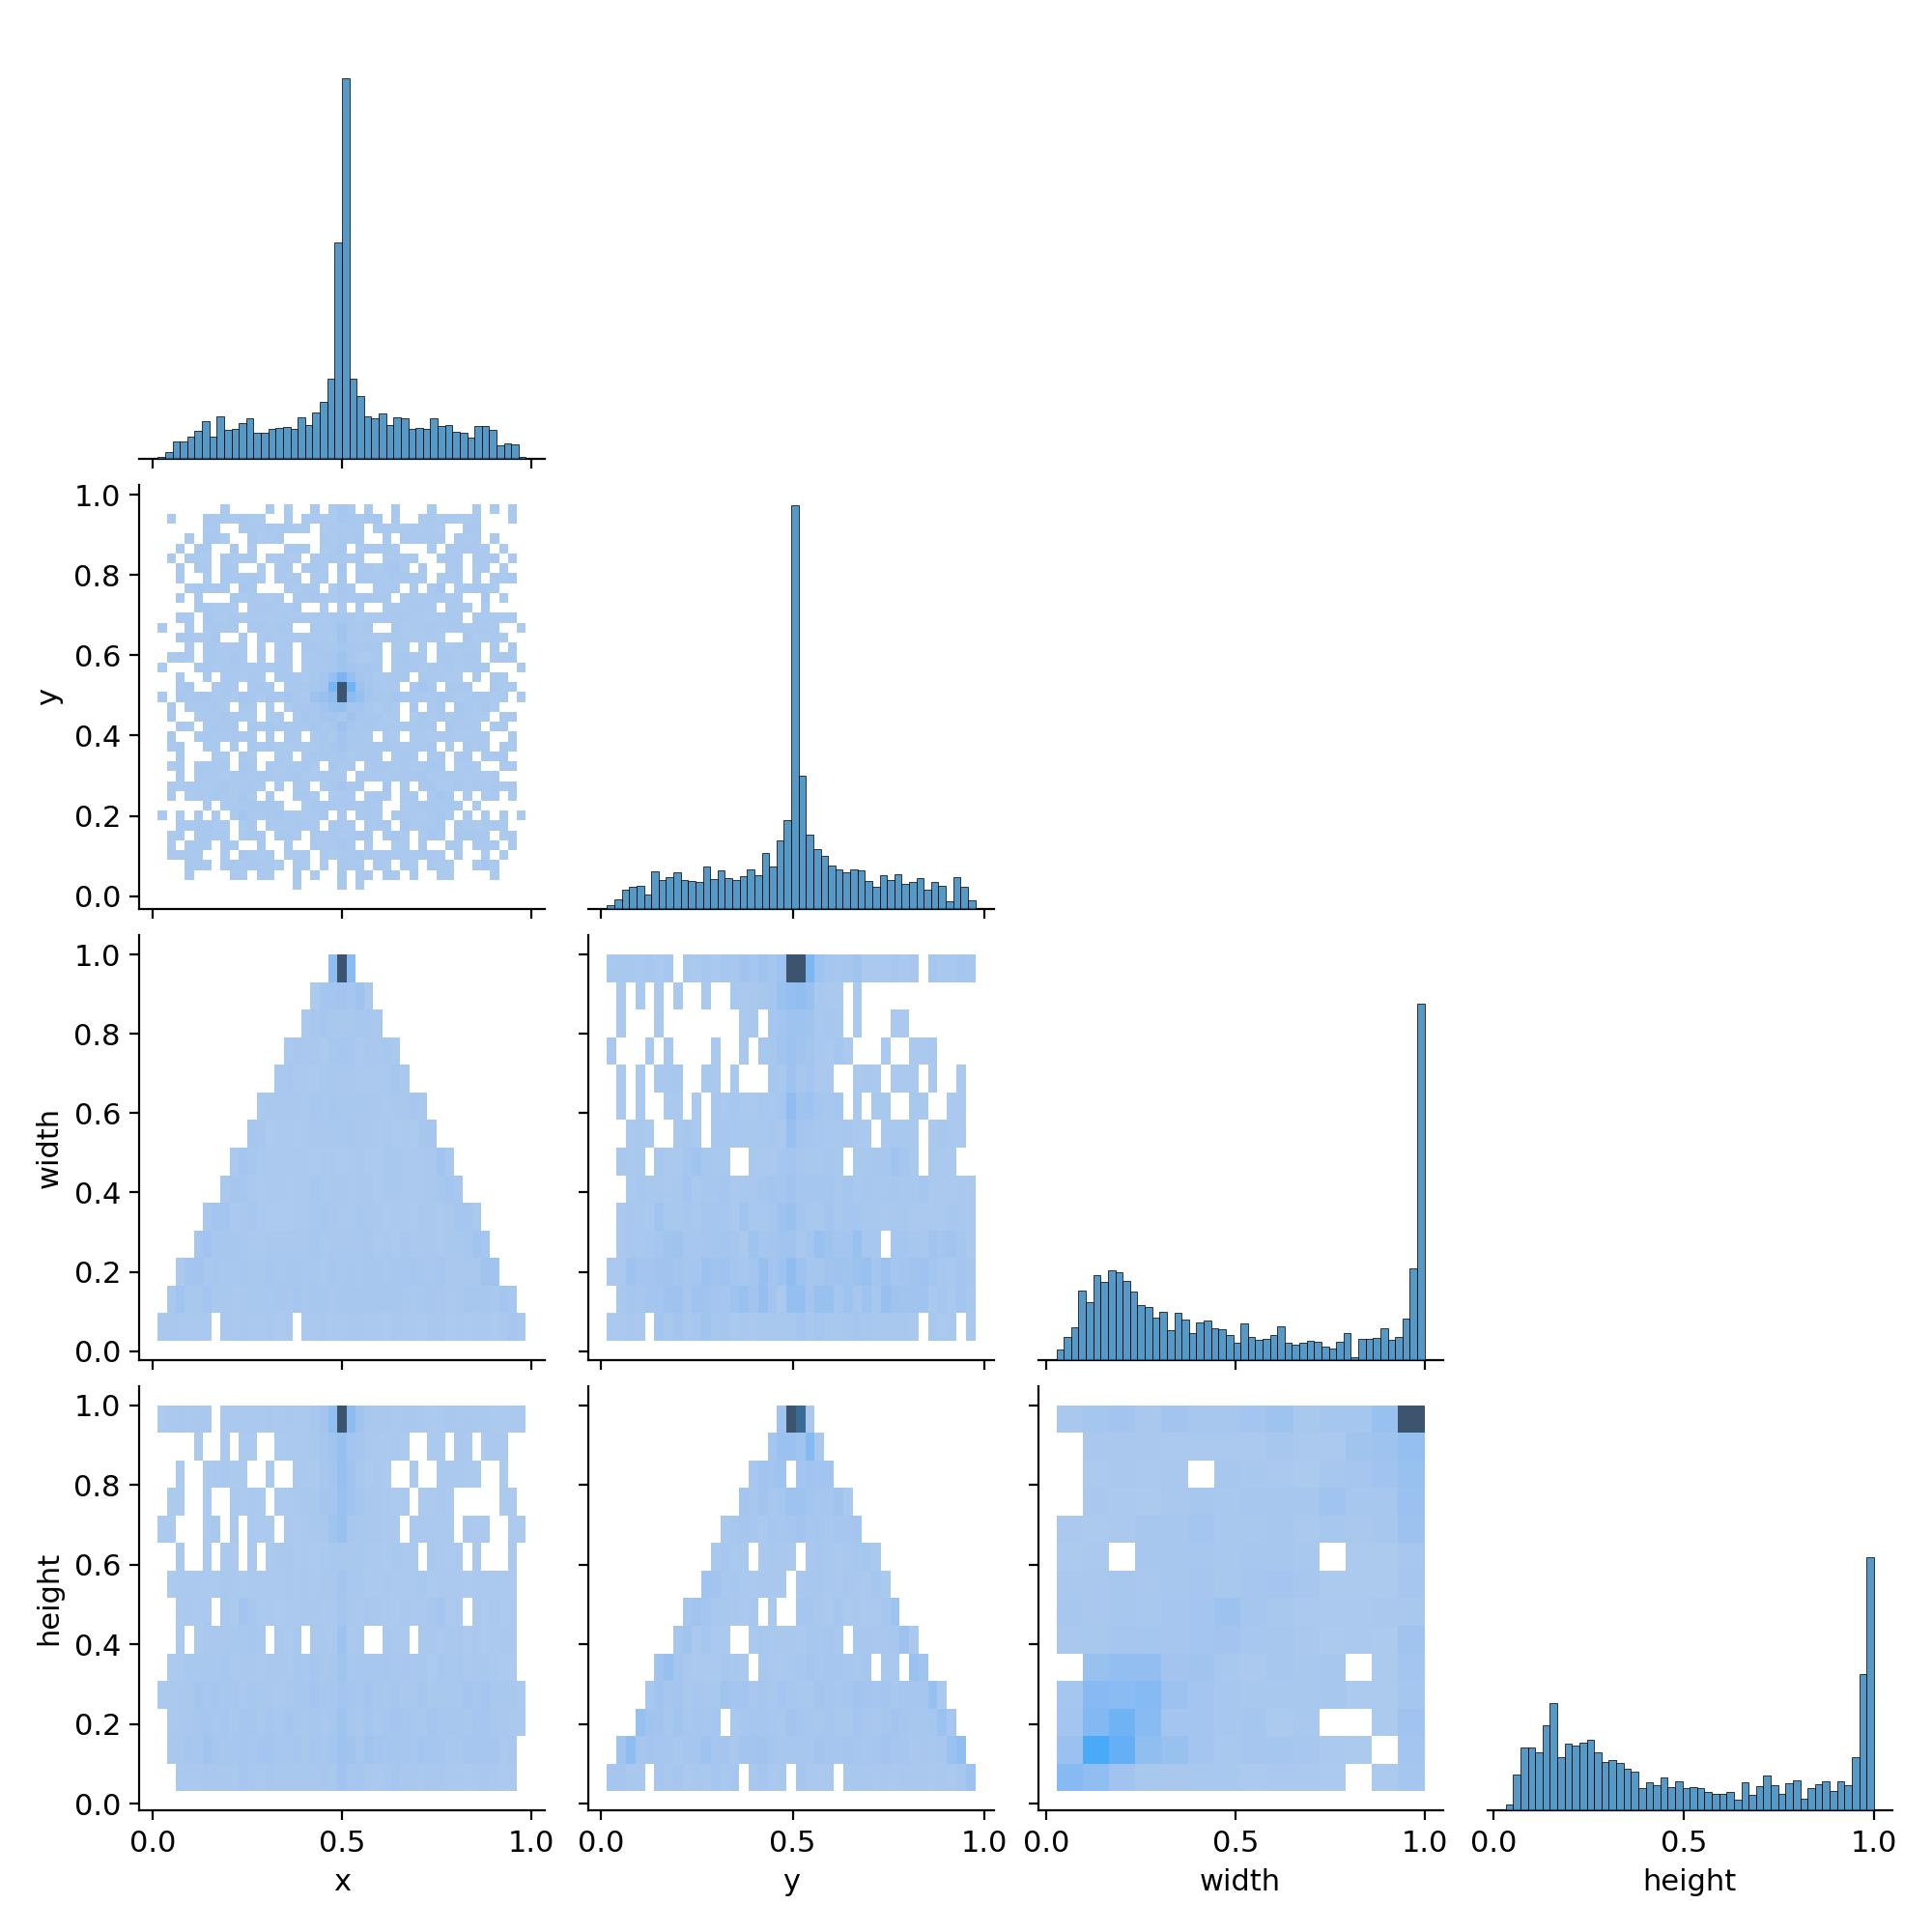

In [18]:
Image(filename='/kaggle/working/runs/detect/train/labels_correlogram.jpg', width=600)

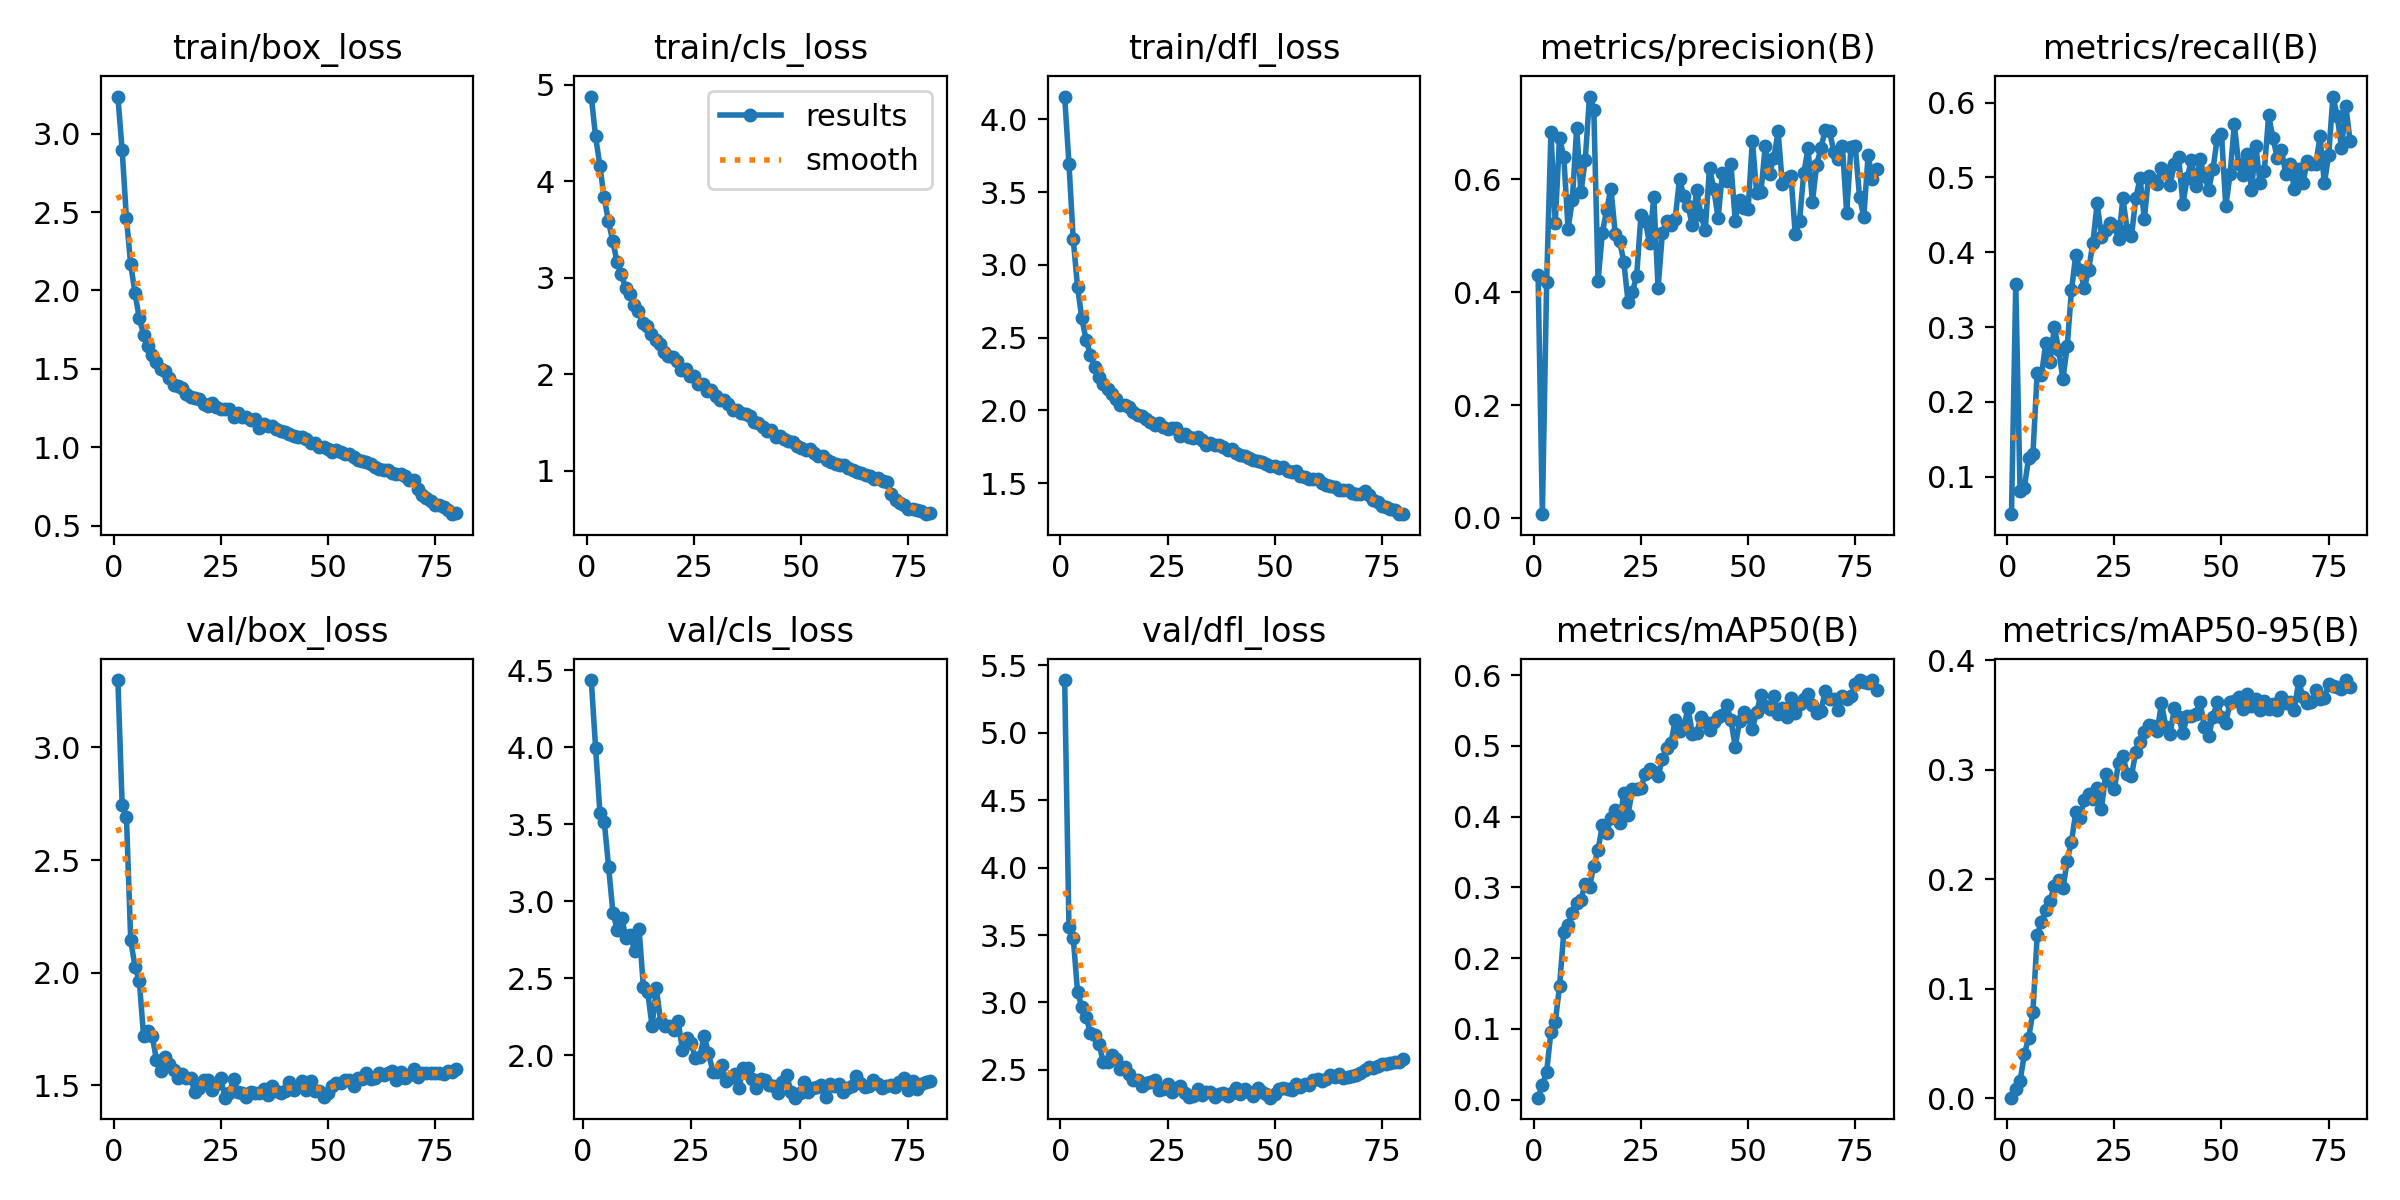

In [19]:
Image(filename='/kaggle/working/runs/detect/train/results.png', width=600)

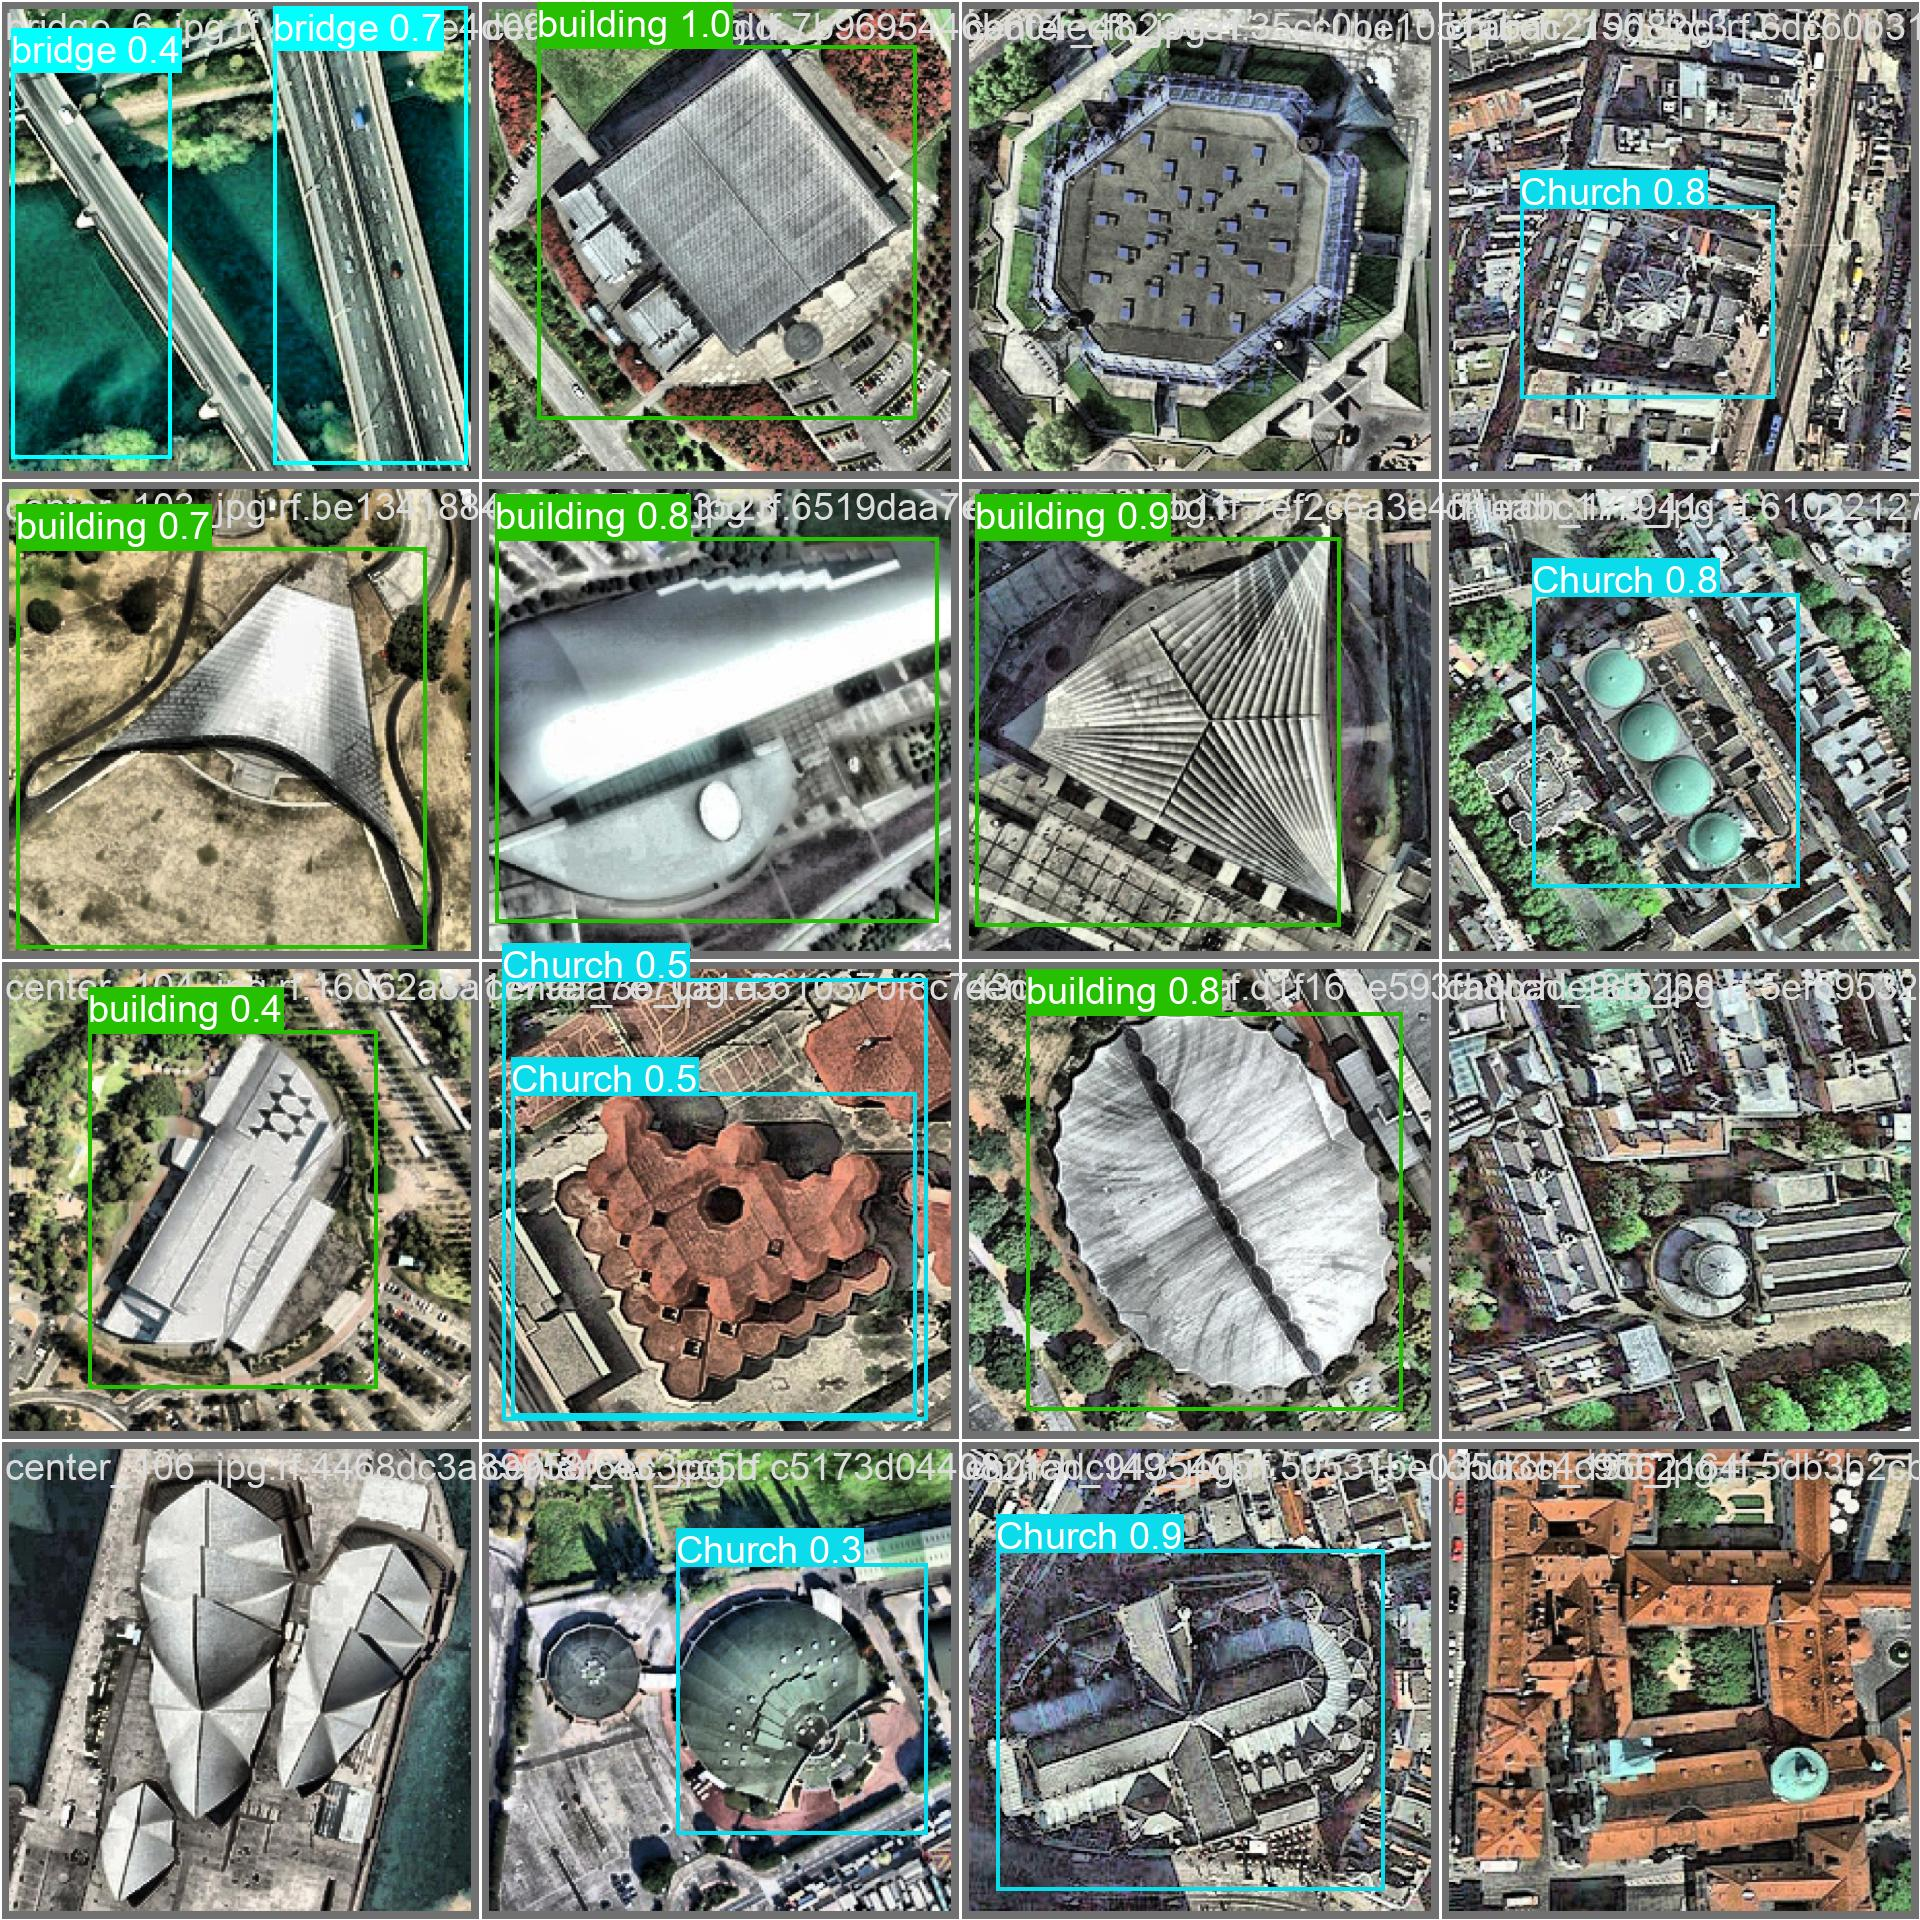

In [22]:
Image(filename='/kaggle/working/runs/detect/train/val_batch2_pred.jpg', width=600)

In [21]:
import pandas as pd
data = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
data

epoch        train/box_loss        train/cls_loss  \
0                      1               3.23590               4.87840   
1                      2               2.89310               4.46690   
2                      3               2.45880               4.16270   
3                      4               2.16590               3.83310   
4                      5               1.98260               3.58980   
..                   ...                   ...                   ...   
75                    76               0.63167               0.60719   
76                    77               0.62155               0.59120   
77                    78               0.60371               0.58643   
78                    79               0.57411               0.55279   
79                    80               0.58298               0.56013   

          train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                 4.1575               0.43060               0.04974   
1                 3.6938               0.00667               0.35715   
2                 3.1753               0.41772               0.08101   
3                 2.8497               0.68364               0.08537   
4                 2.6333               0.52190               0.12490   
..                   ...                   ...                   ...   
75                1.3346               0.56890               0.60816   
76                1.3232               0.53321               0.58268   
77                1.3183               0.64253               0.53954   
78                1.2867               0.59961               0.59580   
79                1.2900               0.61764               0.54878   

        metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0                0.00285               0.00058                3.2985   
1                0.02035               0.00834                2.7446   
2                0.03953               0.01577                2.6896   
3                0.09582               0.04004                2.1433   
4                0.10919               0.05536                2.0261   
..                   ...                   ...                   ...   
75               0.59317               0.37665                1.5554   
76               0.59071               0.37593                1.5521   
77               0.58930               0.37399                1.5640   
78               0.59265               0.38188                1.5617   
79               0.57932               0.37524                1.5742   

               val/cls_loss          val/dfl_loss                lr/pg0  \
0                       inf                5.3920              0.000123   
1                     4.436                3.5566              0.000243   
2                    3.9928                3.4798              0.000360   
3                    3.5723                3.0788              0.000356   
4                    3.5146                2.9647              0.000352   
..                      ...                   ...                   ...   
75                   1.8291                2.5402              0.000027   
76                   1.7798                2.5473              0.000022   
77                   1.8152                2.5565              0.000017   
78                   1.8259                2.5577              0.000013   
79                   1.8348                2.5782              0.000008   

                  lr/pg1                lr/pg2  
0               0.000123              0.000123  
1               0.000243              0.000243  
2               0.000360              0.000360  
3               0.000356              0.000356  
4               0.000352              0.000352  
..                   ...                   ...  
75              0.000027              0.000027  
76              0.000022              0.000022  
77              0.000017              0.000017  
78              0.000013         

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [11]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.88, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/nishant-raghuwanshi-deep-learning/satellite-images-jnhcj-jtugd/1
Share your model with the world at: https://universe.roboflow.com/nishant-raghuwanshi-deep-learning/satellite-images-jnhcj-jtugd/model/1
